In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
path= Path.cwd().parents[0] / 'input/original_dataset.csv'
df= pd.read_csv(path)

# 1. Pre-ML Profiling

Here we will take a look at our features before training an ML model.

In [3]:
print('Number of unique value per column:')
for col in df.columns:
    print(f'\t{col}: {df[col].nunique(dropna= False)}')

Number of unique value per column:
	Age: 43
	Attrition: 2
	BusinessTravel: 3
	DailyRate: 886
	Department: 3
	DistanceFromHome: 29
	Education: 5
	EducationField: 6
	EmployeeCount: 1
	EmployeeNumber: 1470
	EnvironmentSatisfaction: 4
	Gender: 2
	HourlyRate: 71
	JobInvolvement: 4
	JobLevel: 5
	JobRole: 9
	JobSatisfaction: 4
	MaritalStatus: 3
	MonthlyIncome: 1349
	MonthlyRate: 1427
	NumCompaniesWorked: 10
	Over18: 1
	OverTime: 2
	PercentSalaryHike: 15
	PerformanceRating: 2
	RelationshipSatisfaction: 4
	StandardHours: 1
	StockOptionLevel: 4
	TotalWorkingYears: 40
	TrainingTimesLastYear: 7
	WorkLifeBalance: 4
	YearsAtCompany: 37
	YearsInCurrentRole: 19
	YearsSinceLastPromotion: 16
	YearsWithCurrManager: 18


In [4]:
cat= [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime',
]

num= [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'Education',
    'EnvironmentSatisfaction',
    'HourlyRate',
    'JobInvolvement',
    'JobLevel',
    'JobSatisfaction',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'WorkLifeBalance',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
]

unused= [
    'EmployeeCount',
    'EmployeeNumber',
    'StandardHours', 
    'Over18,'
]

In [5]:
def create_countplot(data, ax, x, hue= None):
    sns.countplot(
        data= data, 
        x= x, 
        hue= hue, 
        palette= 'Set1',
        ax= ax
    )

def create_kdeplot(data, ax, x, hue= None):
    sns.kdeplot(
        data= data, 
        x= x, 
        fill= False, 
        hue= hue,
        palette= 'Set1',
        ax= ax,
    )

def create_normalized_countplot(data, ax, x, hue):
    (data
        .groupby(x)[hue]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        .pipe((sns.barplot, 'data'), x= col , y='percent',hue= hue, palette= 'Set1', ax= ax)
     )
    
def create_violinplot(data, ax, x, y):
    sns.violinplot(
        data= data, 
        x= x,
        y= y, 
        palette= 'Set1', 
        ax= ax
    )

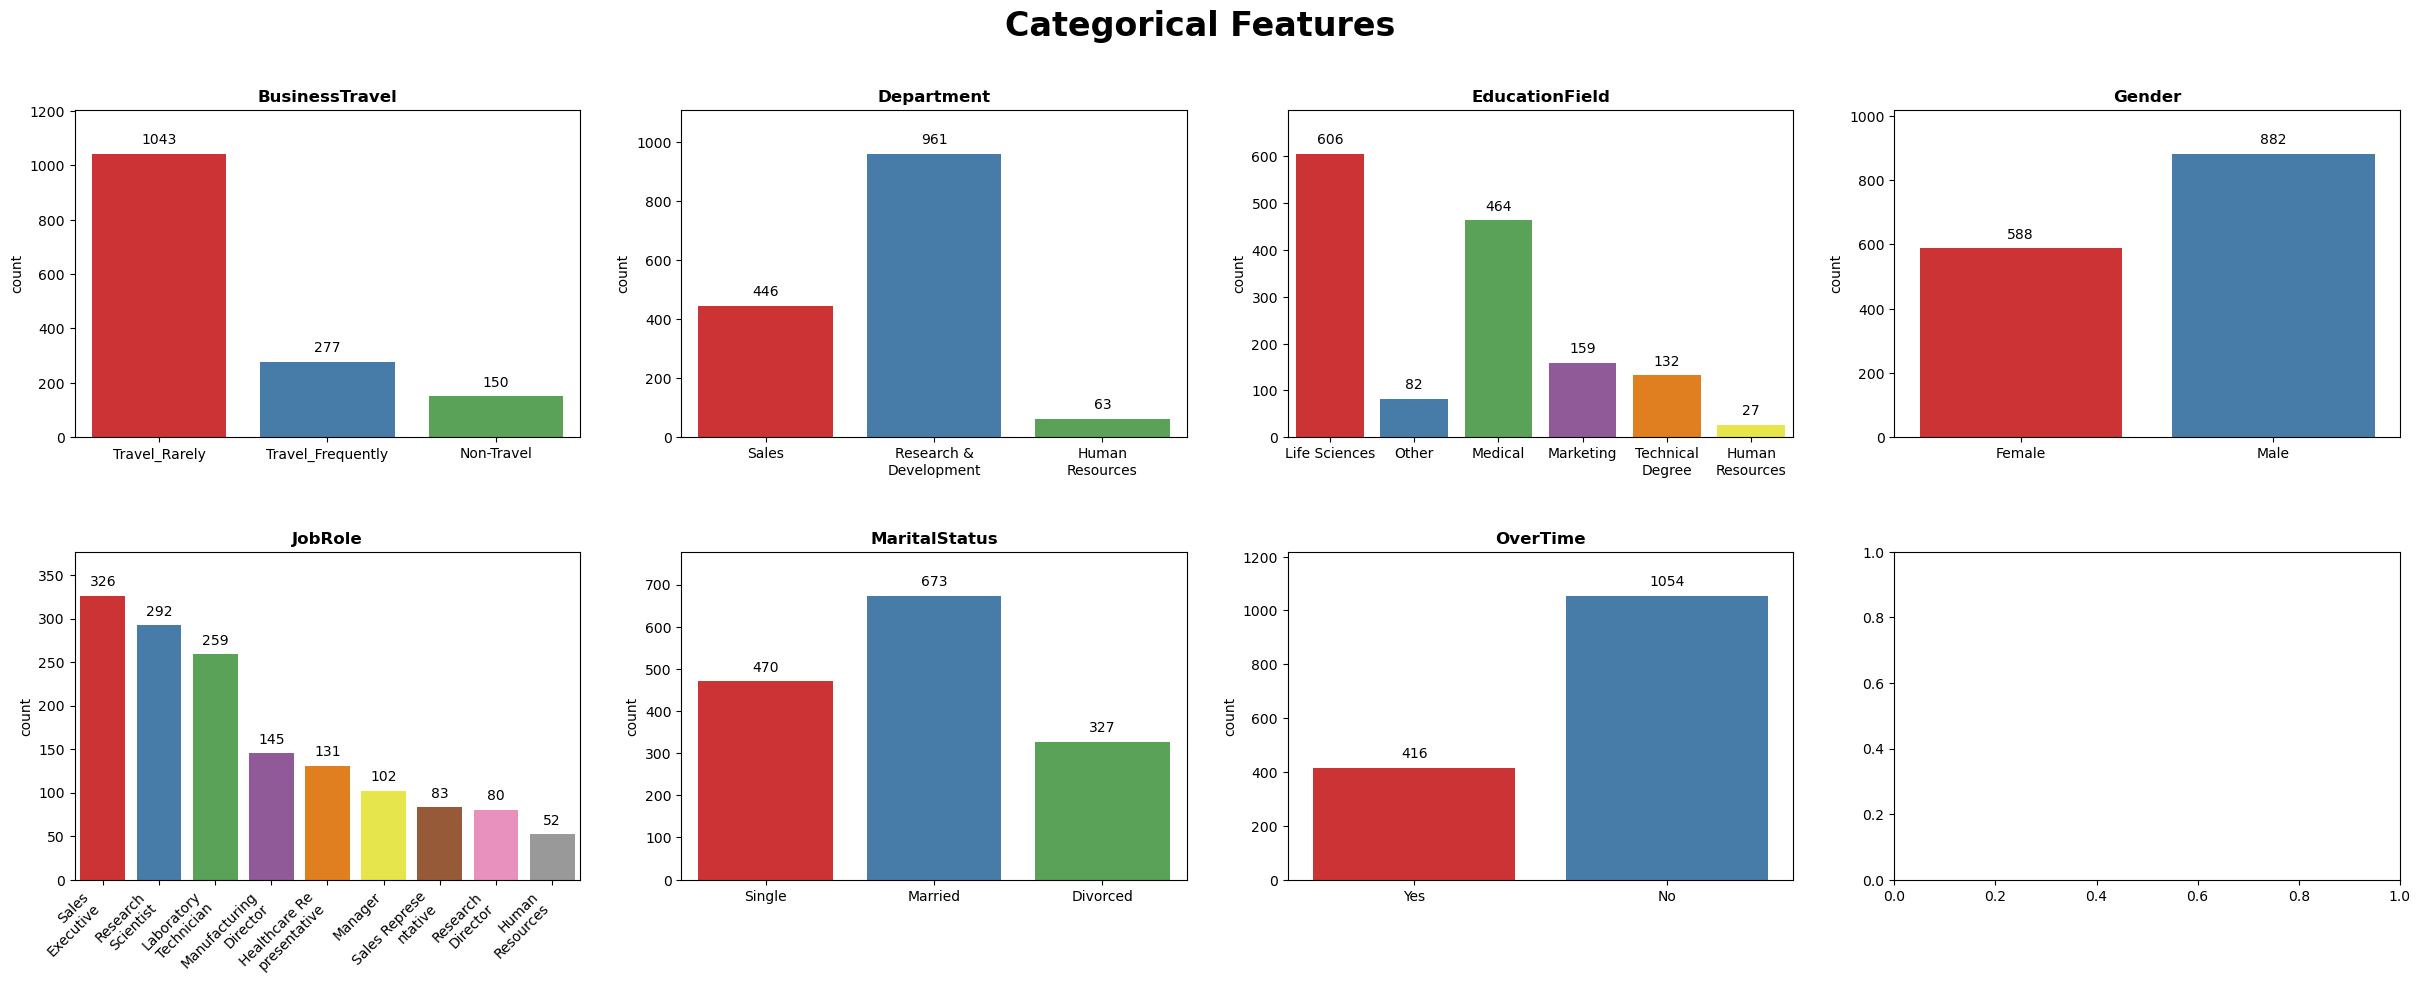

In [7]:
nrows= 4
ncols= int(np.ceil(len(cat)/nrows))

fig, axs= plt.subplots(
    ncols, 
    nrows, 
    figsize= (30, 10), 
    facecolor= 'white',
)

from textwrap import wrap

for (col, ax) in zip(cat, axs.reshape(-1)):
    
    # create plot
    create_countplot(data= df, ax= ax, x= col)
    
    # remove xlabel
    ax.set_xlabel('')
    
    # set title
    ax.set_title(col, fontweight= 'bold')

    # make long xlabels better
    if col in ['Department', 'EducationField', 'JobRole']:
        
        # wrap label
        labels= ax.get_xticklabels()
        label_texts= [label.get_text() for label in labels]
        label_wrapped= ['\n'.join(wrap(label, 13)) for label in label_texts]
        ax.set_xticklabels(label_wrapped)
        
    # rotate label
    if col in ['JobRole']:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()),  
            ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points'
        )

    # set ylim to 110% of the original ylim
    ylim= ax.get_ylim()[1] * 1.1
    ax.set_ylim(0, ylim)

plt.suptitle('Categorical Features', fontweight= 'bold', fontsize= 24)
# fig.tight_layout()
plt.subplots_adjust(left= None, bottom= None, right= None, top= None, wspace= None, hspace= 0.35)
plt.show()

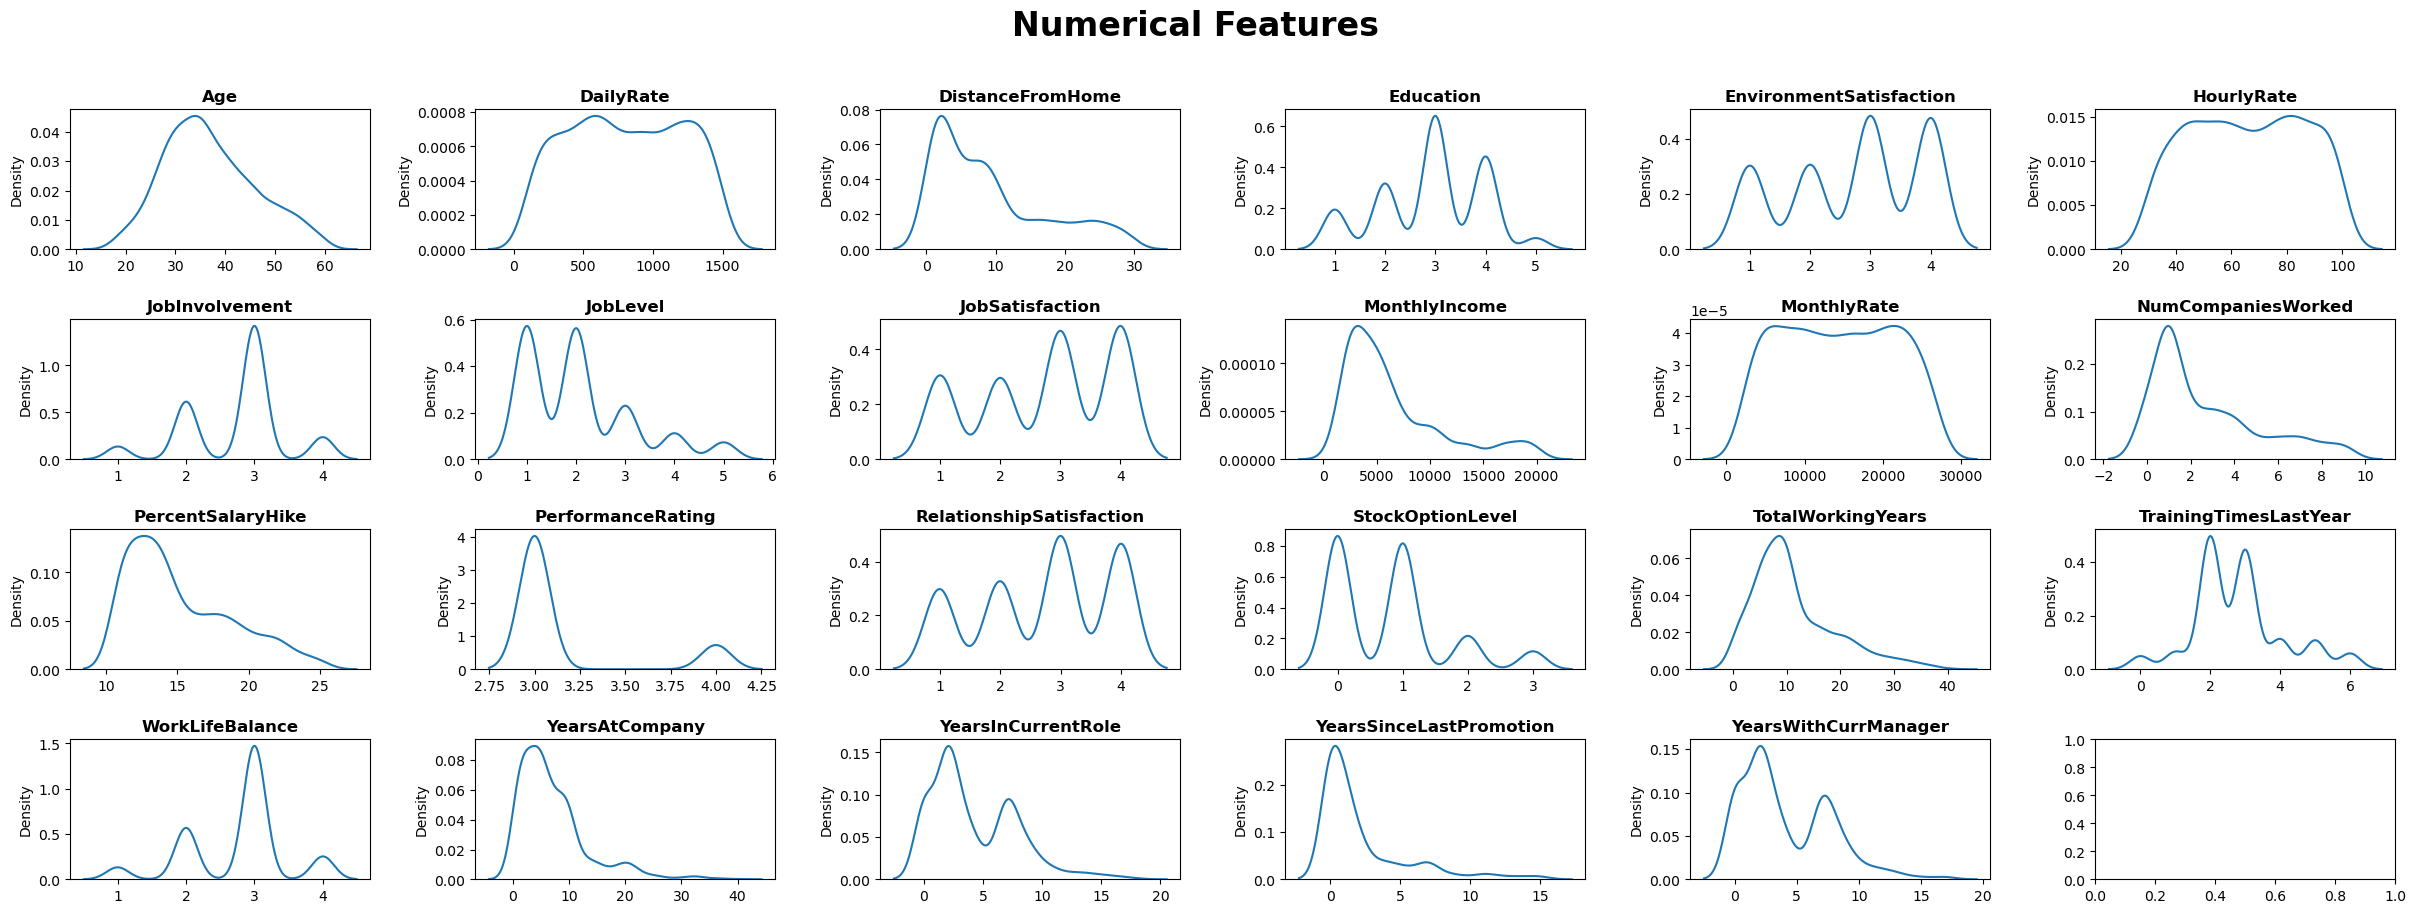

In [8]:
nrows= 6
ncols= int(np.ceil(len(num)/nrows))

fig, axs= plt.subplots(
    ncols, 
    nrows, 
    figsize= (30, 10), 
    facecolor= 'white',
)

import warnings
for (col, ax) in zip(num, axs.reshape(-1)):
    
    # create plot
    # ignore userwarning stating that palette is ignored
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        create_kdeplot(data= df, ax= ax, x= col)
    
    # remove xlabel
    ax.set_xlabel('')
    
    # set title
    ax.set_title(col, fontweight= 'bold')

plt.suptitle('Numerical Features', fontweight= 'bold', fontsize= 24)
# fig.tight_layout()
plt.subplots_adjust(left= None, bottom= None, right= None, top= None, wspace= 0.35, hspace= 0.5)
plt.show()

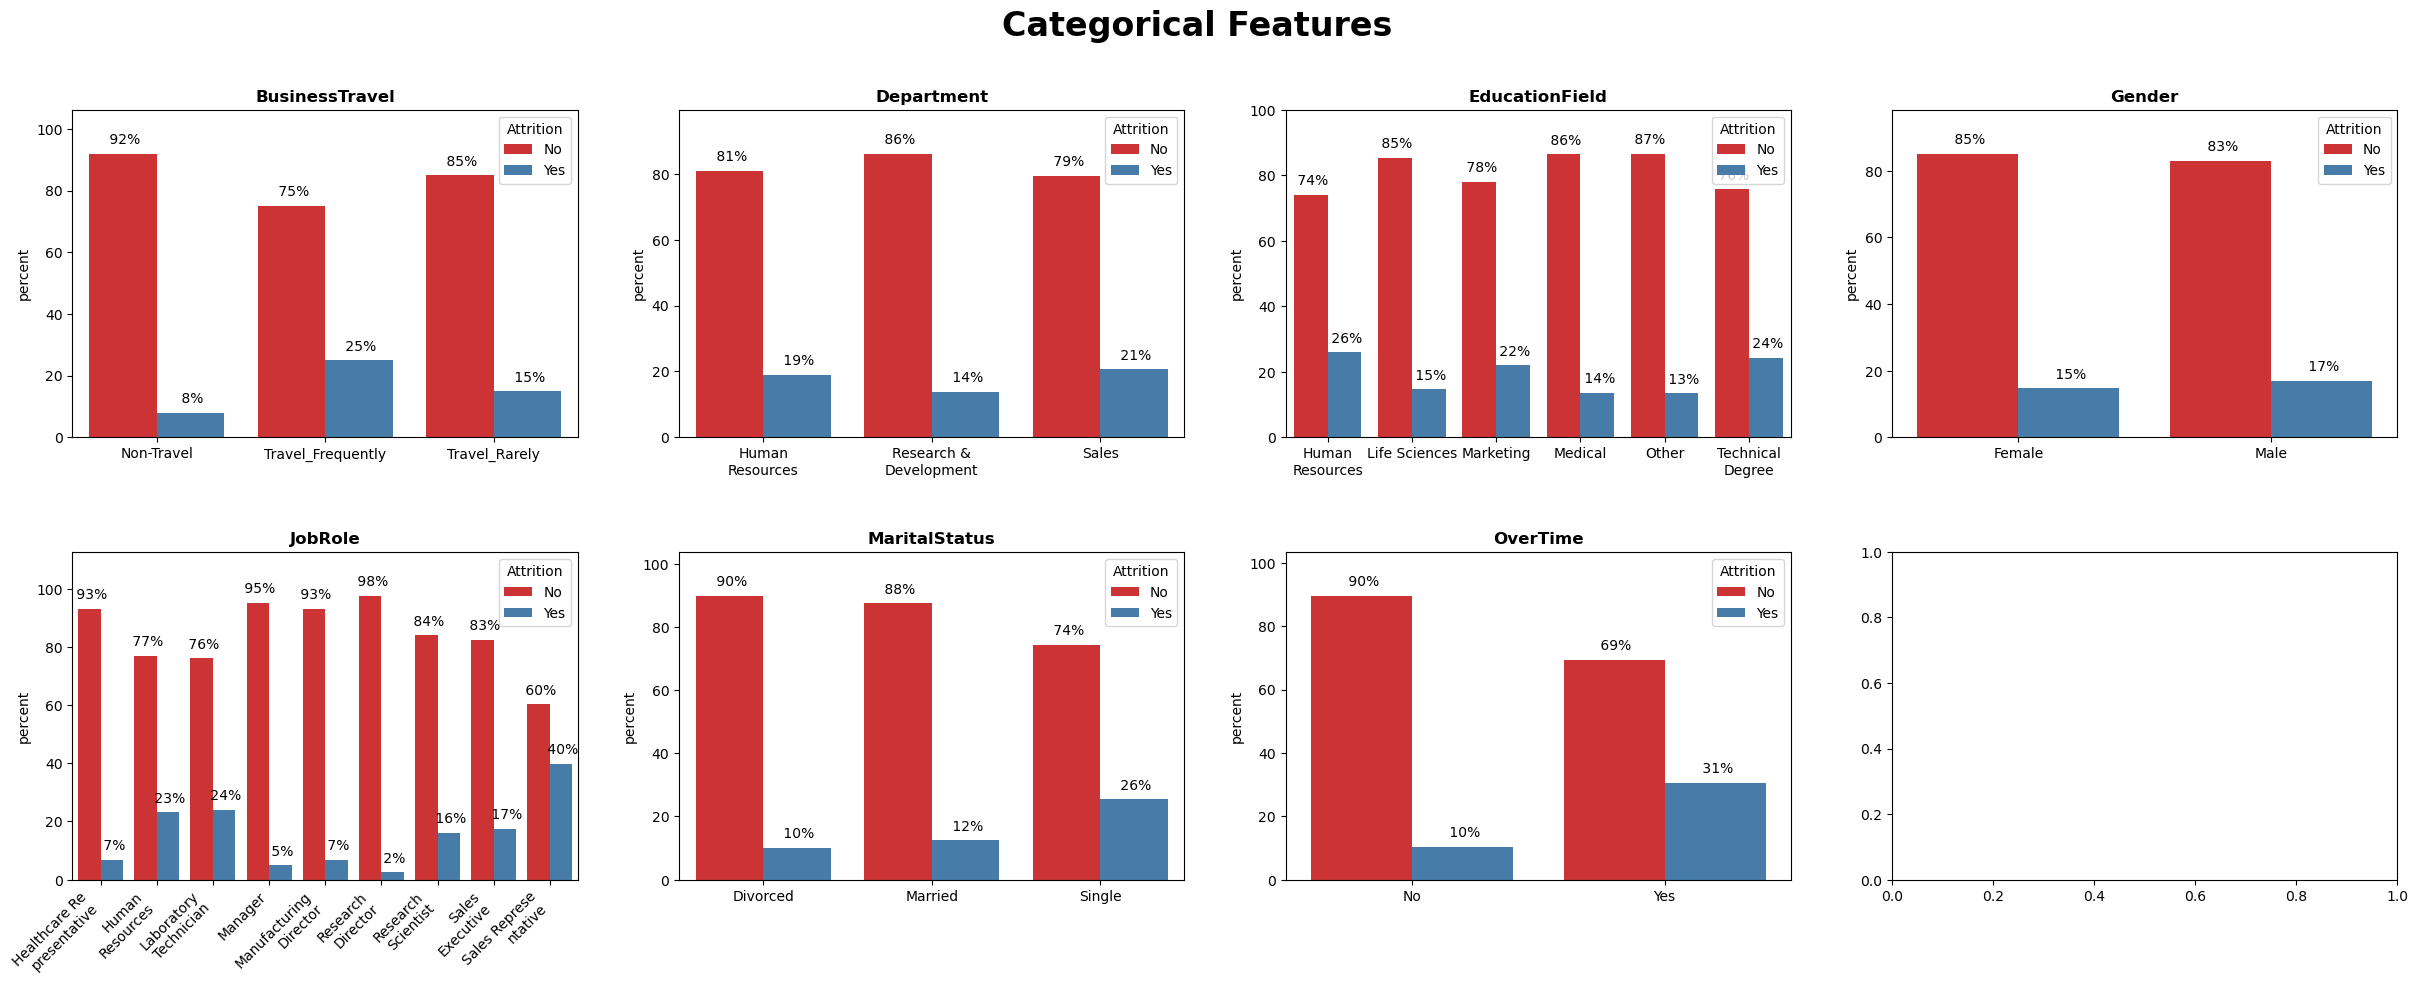

In [9]:
nrows= 4
ncols= int(np.ceil(len(cat)/nrows))

fig, axs= plt.subplots(
    ncols, 
    nrows, 
    figsize= (30, 10), 
    facecolor= 'white',
)

from textwrap import wrap

for (col, ax) in zip(cat, axs.reshape(-1)):
    
    # create plot
    create_normalized_countplot(data= df, ax= ax, x= col, hue= 'Attrition')
    
    # remove xlabel
    ax.set_xlabel('')
    
    # set title
    ax.set_title(col, fontweight= 'bold')

    # make long xlabels better
    if col in ['Department', 'EducationField', 'JobRole']:
        
        # wrap label
        labels= ax.get_xticklabels()
        label_texts= [label.get_text() for label in labels]
        label_wrapped= ['\n'.join(wrap(label, 13)) for label in label_texts]
        ax.set_xticklabels(label_wrapped)
        
    # rotate label
    if col in ['JobRole']:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    # annotate bar
    for p in ax.patches:
        ax.annotate(
            format(f'{p.get_height(): .0f}%'), 
            (p.get_x() + p.get_width() / 2., p.get_height()),  
            ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points'
        )

    # set ylim to 110% of the original ylim
    ylim= ax.get_ylim()[1] * 1.1
    ax.set_ylim(0, ylim)

plt.suptitle('Categorical Features', fontweight= 'bold', fontsize= 24)
# fig.tight_layout()
plt.subplots_adjust(left= None, bottom= None, right= None, top= None, wspace= None, hspace= 0.35)
plt.show()

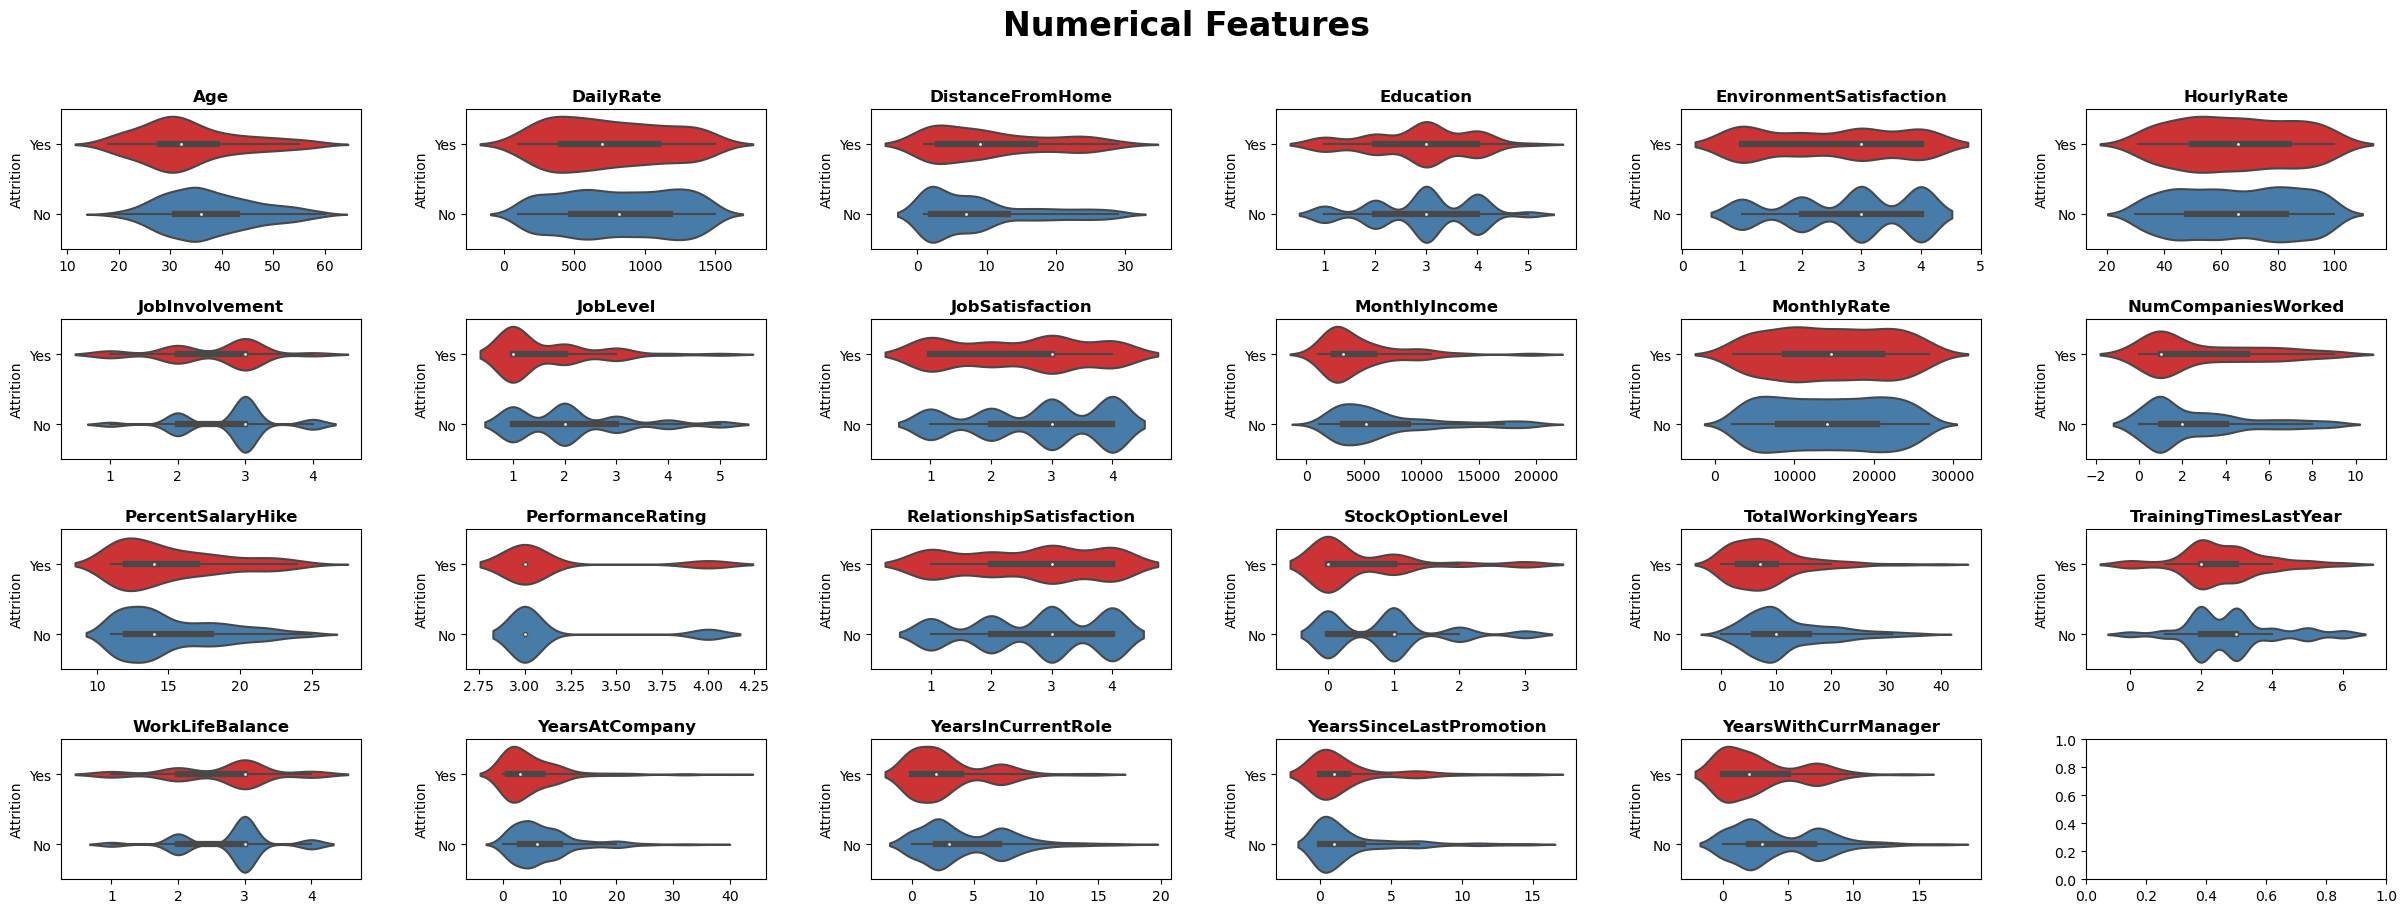

In [10]:
nrows= 6
ncols= int(np.ceil(len(num)/nrows))

fig, axs= plt.subplots(
    ncols, 
    nrows, 
    figsize= (30, 10), 
    facecolor= 'white',
)


for (col, ax) in zip(num, axs.reshape(-1)):
    
    # create plot
    create_violinplot(data= df, ax= ax, x= col, y= 'Attrition')
    
    # remove xlabel
    ax.set_xlabel('')
    
    # set title
    ax.set_title(col, fontweight= 'bold')

plt.suptitle('Numerical Features', fontweight= 'bold', fontsize= 24)
# fig.tight_layout()
plt.subplots_adjust(left= None, bottom= None, right= None, top= None, wspace= 0.35, hspace= 0.5)
plt.show()

Based on our exploration, here is what we got:

Categorical
- BusinessTravel: Imbalanced. Most employees travel rarely while small minority do not travel at all.
- Department: Imbalanced. There are only 63 HR employees. 
- EducationField: Imbalanced. There are only 27 and 82 HR and Other education respectively. 
- JobRole: Imbalanced but not too extreme. Smallest subset = 52, biggest subset = 326.

Numerical
- DistanceFromHome: Long tailed.
- MonthlyIncome: Long tailed.
- NumCompaniesWorked: Long tailed.
- PercentSalaryHike: Long tailed.
- PerformanceRating: Only consists of 2 values, 3 and 4.
- TotalWorkingYears: Long tailed.
- TrainingTimesLastYear: Bimodal in 2 and 3.
- YearsAtCompany: Long tailed.
- YearsInCurrentRole: Bimodal in 2 and 7.
- YearsSinceLastPromotion: Long tailed.
- YearsWithCurrManager: Bimodal in 2 and 7.


# 2. Machine Learning Prediction

Here is the result of our first training, without any hyperparameter. 

In [17]:
print('Training result:')

path= Path.cwd().parents[0] / 'output/train_result.csv'
result= pd.read_csv(path)

(result
    .drop(columns= 'fold')
    .groupby('model')
    .mean()
    .sort_values('test_f1', ascending= False)
    .loc[lambda df_: ~(df_.index.str.contains('tuned'))]
)

Training result:


,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
model,,,,,,
logres,0.077507,0.025787,0.534991,0.613491,0.877395,0.900766
ada,0.270045,0.035256,0.482915,0.645813,0.860536,0.908812
sgd,0.043862,0.017187,0.477902,0.514032,0.841379,0.859770
xgb,0.413942,0.020415,0.475360,1.000000,0.875096,1.000000
lgb,0.189516,0.023229,0.442179,1.000000,0.874330,1.000000
gb,0.631956,0.020739,0.432460,0.898359,0.867433,0.970115
dt,0.064511,0.022545,0.354988,1.000000,0.776245,1.000000
svc,0.109788,0.076408,0.353466,0.681273,0.868966,0.922222
gp,1.035368,0.064757,0.336071,1.000000,0.825287,1.000000


We can see that logistic regression score the highest (by test F1). 

Also, note that XGBoost, LighGGM, Decision Tree, Gaussian Process and Random Forest scores perfect F1 on training, but perform poorly on test set. This means that they overfit on the training set.

Based on this result, I will try to optimize top four models: 
1. Logistic regression
2. Adaboost
3. Stocastic gradient descent
4. XGBoost

First, I will use randomized search CV. Here is the result with these three models after first round of HP tuning.

In [18]:
print('Training result:')

path= Path.cwd().parents[0] / 'output/train_result.csv'
result= pd.read_csv(path)

(result
    .drop(columns= 'fold')
    .groupby('model')
    .mean()
    .sort_values('test_f1', ascending= False)
    .loc[lambda df_: ~(df_.index.str.contains('tuned_bayes'))]
)

Training result:


,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
model,,,,,,
logres_tuned_random,0.404086,0.143987,0.574753,0.608976,0.881226,0.892720
sgd_tuned_random,0.509317,0.075531,0.548277,0.554758,0.852874,0.856322
logres,0.077796,0.020978,0.534991,0.613491,0.877395,0.900766
ada_tuned_random,1.031071,0.067019,0.525771,0.793735,0.865900,0.940996
xgb_tuned_random,0.280005,0.021942,0.507940,0.642484,0.884291,0.911877
ada,0.360300,0.046058,0.482915,0.645813,0.860536,0.908812
xgb,0.436251,0.035898,0.475360,1.000000,0.875096,1.000000
lgb,0.233320,0.031535,0.442179,1.000000,0.874330,1.000000
gb,0.760096,0.026812,0.437344,0.898359,0.868199,0.970115


All 3 models outperformed the original model. However, I'm not satisfied. I'm sure we can do better with better HP tuning method. I will use Bayesian optimization.

In [19]:
print('Training result:')

path= Path.cwd().parents[0] / 'output/train_result.csv'
result= pd.read_csv(path)

(result
    .drop(columns= 'fold')
    .groupby('model')
    .mean()
    .sort_values('test_f1', ascending= False)
)

Training result:


,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
model,,,,,,
logres_tuned_bayes,0.053483,0.023406,0.585325,0.612616,0.870498,0.877778
logres_tuned_random,0.404086,0.143987,0.574753,0.608976,0.881226,0.892720
ada_tuned_bayes,1.016788,0.078260,0.572536,0.773220,0.877395,0.936015
sgd_tuned_random,0.509317,0.075531,0.548277,0.554758,0.852874,0.856322
xgb_tuned_bayes,0.168296,0.023482,0.540783,0.891081,0.880460,0.967816
logres,0.077796,0.020978,0.534991,0.613491,0.877395,0.900766
ada_tuned_random,1.031071,0.067019,0.525771,0.793735,0.865900,0.940996
xgb_tuned_random,0.280005,0.021942,0.507940,0.642484,0.884291,0.911877
ada,0.360300,0.046058,0.482915,0.645813,0.860536,0.908812


Now all our tuned models outperformed base model! In this case, logistic regression seems to do superb. Now we will train the top 3 models, train on full training dataset and test it on test set

In [21]:
print('Test result:')

path= Path.cwd().parents[0] / 'output/test_result.csv'
result= pd.read_csv(path)

(result
    .rename(columns= {'Unnamed: 0': 'model'})
    .sort_values('test_f1', ascending= False)
    .reset_index(drop= True)
)

Test result:


,model,test_accuracy,test_f1
0,sgd_tuned_random,0.860606,0.488889
1,logres_tuned_bayes,0.872727,0.487805
2,logres_tuned_random,0.854545,0.368421
3,ada_tuned_bayes,0.848485,0.358974
4,xgb_tuned_bayes,0.842424,0.350000


# See Test Prediction

In [59]:
import pickle
path= Path.cwd().parents[0] / 'output/test_pred.pkl'

# load y_pred from pickle
with open(path, "rb") as fp: 
    b = pickle.load(fp)

# get model name, y_test and y_pred
model_name= b[0][0]
y_test= b[1][0]
y_pred= b[2][0]

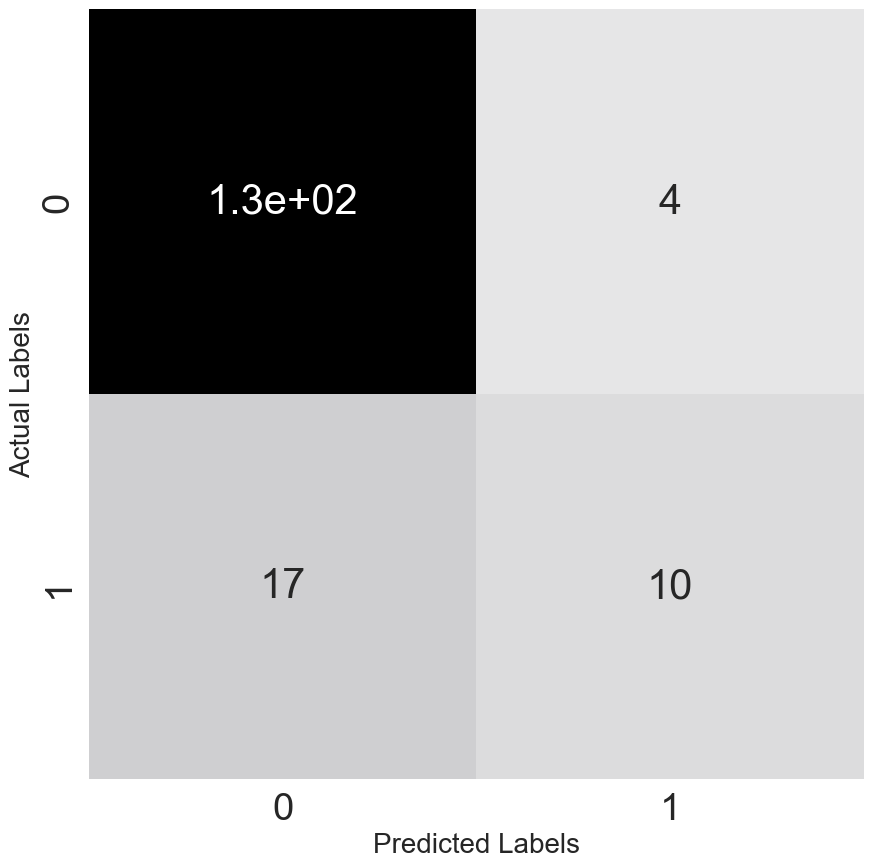

In [61]:
# get confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,as_cmap=True)

# sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

plt.show()

# Feature Importance

In [22]:
import joblib

path= Path.cwd().parents[0] / 'model/logres_tuned_bayes.sav'
model= joblib.load(path)
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='NONE',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime']),
                                                 ('num'...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'sqrt'>,
                                                                                       inverse_func=<ufunc 'square'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['DistanceFromHome',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsSinceLastPromotion'])])),
                ('prediction',
                 Pipeline(steps=[('model',
                                  LogisticRegression(C=0.0014295171076570674,
                                                     max_iter=1000,
                                                     solver='liblinear'))]))])

In [26]:
coef_= model[1][0].coef_.ravel()
features= model[0].get_feature_names_out()

# make a df of features and their coefs
importances= dict(zip(features, coef_))
importances= pd.DataFrame(data= importances.values(), index= importances.keys(), columns= ['coef'])

# clean df
importances= (importances
    .sort_values('coef', ascending= False)
    .assign(model= lambda df_: df_.index.str.replace('^.+__', '', regex= True))
)

# display df
importances.head(5)

,coef,model
cat__OverTime_Yes,0.088496,OverTime_Yes
cat__MaritalStatus_Single,0.056688,MaritalStatus_Single
cat__JobRole_Sales Representative,0.050847,JobRole_Sales Representative
cat__BusinessTravel_Travel_Frequently,0.049879,BusinessTravel_Travel_Frequently
cat__JobRole_Laboratory Technician,0.040208,JobRole_Laboratory Technician


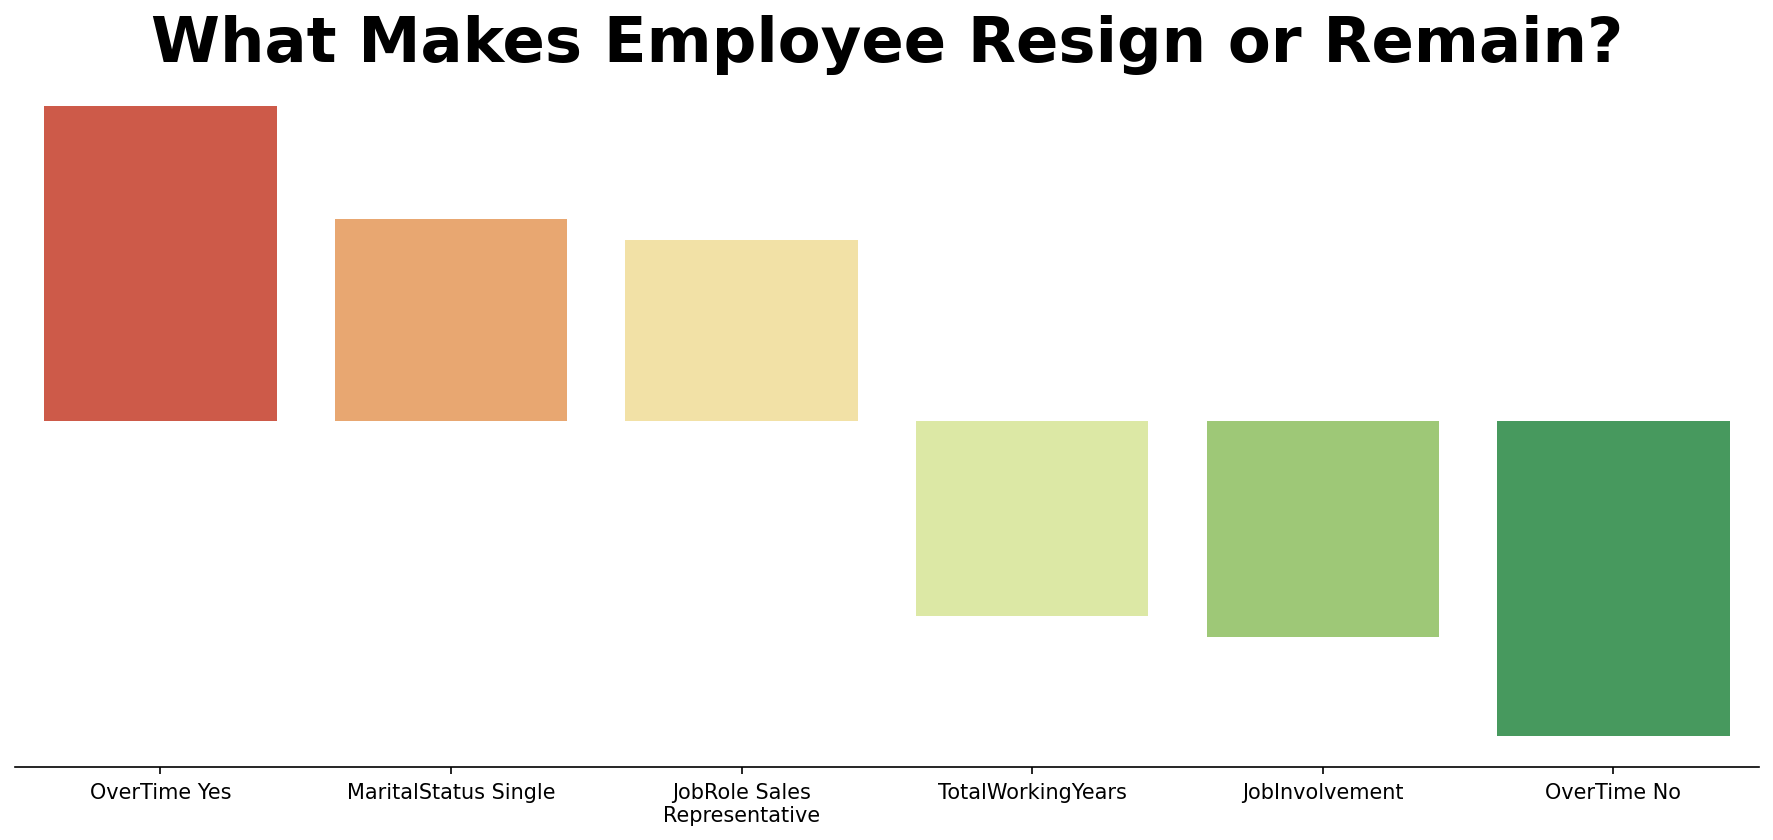

In [52]:
plt.figure(figsize= (15, 6), dpi= 150)

ax= sns.barplot(
    data= pd.concat([importances.head(3), importances.tail(3)]),
    x= 'model',
    y= 'coef',
    palette= 'RdYlGn'
)

# wrap x tick labels
from textwrap import wrap
labels= ax.get_xticklabels()
label_texts= [label.get_text().replace('_', ' ') for label in labels]
label_wrapped= ['\n'.join(wrap(label, 20)) for label in label_texts]
ax.set_xticklabels(label_wrapped)

# set axis label
ax.set_xlabel('')
ax.set_ylabel('')

# set spine
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.tick_params(left=False)
ax.tick_params(labelleft=False)
ax.set_yticks([])

# set title
ax.set_title('What Makes Employee Resign or Remain?', fontsize= 30, fontweight= 'bold')

plt.show()